In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("ticks")
seaborn.set_context("notebook")

# Solution to Exercise 2 (Nov. 17 & 24, 2020)
---

# 1) Not enough data

Revist bonus question B1 of the [previous exercise](../01_curve_fitting/Exercise_1_Solution.ipynb). What type of inverse problem is presented here? Do you have an idea on how to solve this now? Estimate the model parameters with the appropriate solution approach and plot the model response for 100 [equally spaced values](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) between $x=-15$ to $x=5$ together with the two observations. (Note: Plot 100 responses for the given model in order to achieve a smooth curve, but keep the number of model parameters the same).

**Solution**: Since the parabolic model has 3 parameters and we only have 2 observations, the problem is under-determined. These type of problems can be solved with the minimum-norm solution:
        
$$\mathbf{m}_\text{est}=\mathbf{G}^{T}\left[\mathbf{G G}^{T}\right]^{-1} \mathbf{d}$$

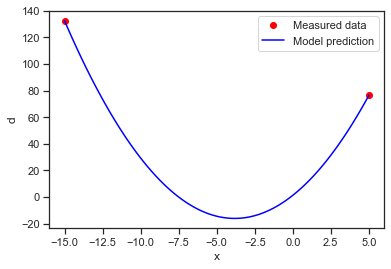

In [2]:
# Estimate model parameters
x0 = np.array([-15, 5])
d0 = np.array([132.6, 76.5])
G0 = np.array((x0**2, x0, np.ones_like(x0))).T
m_est0 = G0.T @ inv(G0 @ G0.T) @ d0

# Evaluate and plot model response
x_s0 = np.linspace(x0[0], x0[-1], 100)
d_pre0 = m_est0[0] * x_s0**2 + m_est0[1] * x_s0 + m_est0[2]

# Plot
plt.plot(x0, d0, "ro", label="Measured data")
plt.plot(x_s0, d_pre0, "b-", label="Model prediction")
plt.xlabel("x")
plt.ylabel("d")
plt.legend()

# 2) Zero-offset profiling

<img src="https://fwagner.info/lehre/updated_fig.png" style="width: 70%;">

A zero-offset seismic depth sounding is conducted with the aim of detecting the subsurface topography of a bedrock, overlain with sediments (see figure above). The surface is located at $z = 0$, and measurements are conducted in equidistant intervals (positions $x_b$).

A simplified seismic model view is assumed: A seismic signal is generated at a source location and the signal is then assumed to travel downwards and reflected at the top of the bedrock. A receiver at the source location then picks up the reflected signal. Measurements are thus travel times (in seconds of the seismic wave from source to bedrock and back $\rightarrow$ TWT, Two-way traveltimes). The P-wave velocity of the sediment layer is assumed to be $v = 2500$ m/s.

A transect of $100$ m length is measured, starting a $x=0$, ending at $x=100$ m. Measurements are equally spaced (with $N_d$ the number of measurements - changes depending on the subtask). The bedrock topography in reality is continuous ($z$); however, for the sake of simplicity (and applicability), assume a finite number of bedrock segments, with a constant depth for each segment ($z_b$) as model parameters.

### 2.1) Describe the model parameters, data parameters, and auxiliary variables and their units. Under which circumstances is the problem unique, over-, mixed-, or under-determined?
Description of the problem:

**Solution**:

* **Model parameters**: model parameters are the bedrock depths at certain segments of the discretized bedrock topography. Measured in meters.
* **Data parameters**: $d$ are the measurements are thus travel times of the seismic wave from source to bedrock and back (TWT, Two-way traveltimes) measured seconds.
* **Auxiliary variables**: Auxiliary variables are geometry defintion, i.e. measurement locations, and the velocity of the upper layer, since both are needed to formulate $\mathbf{G}$.
---

* **Even-determined or unique $[N=M]$**: Exactly enough data available to determine the model parameters. At  every measurement location we have one measurement.
* **Over-determined $[N>M]$**: More than enough data available to determine the model parameters.
* **Under-determined $[N<M]$**: Insufficient data available to determine the model parameters. At some measurement locations, there is imply no information.
* **Mixed-determined**: More than enough data available to determine some of the model parameters, but insufficient data available to determine other model parameters.

### 2.2) Unique-determined problem

Formulate the linear inverse problem for the *unique* (also known as even-determined) problem, given 10 equally spaced measurements. Adjust the number of bedrock segments accordingly.

Estimate the bedrock topography for the following data & measurement positions:

In [3]:
import data
d = data.get_data() # Importing the measured data
x_b = np.linspace(0, 100, 10) # Creating mesurement positions
d, x_b

(array([0.00491314, 0.00343885, 0.00408858, 0.00435696, 0.00375178,
        0.00261924, 0.00205868, 0.00250247, 0.00274555, 0.00142059]),
 array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
         44.44444444,  55.55555556,  66.66666667,  77.77777778,
         88.88888889, 100.        ]))

In addition to the data and measurements we know the seismic velocity $v = 2500$, e.g. from borehole measurements. From these parameters, we try to estimate $z_b$. Perform the inversion by setting up a G matrix and using the appropriate mathematical solution (hint: diagonal matrices can be created conveniently by first creating an [identity matrix](https://numpy.org/doc/stable/reference/generated/numpy.eye.html))

Plot the resulting (discrete) topography using the `plt.step` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.step.html) (with the argument `where="mid"`). Also have a look at the [axhline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axhline.html?highlight=axhline#matplotlib.pyplot.axhline) and [vlines](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html?highlight=vlines#matplotlib.pyplot.vlines) functions to plot the earth surface and the raypaths.

**Solution**: 

The two-way travel time is:

$$t = \frac{2}{v} \, z$$

accordingly, $\mathbf{G}$ can be formulated

$$
\underbrace{
\begin{pmatrix}
t_1\\
\vdots\\
t_{10}
\end{pmatrix}
}_{d \;(10 \times 1)}
=
\underbrace{
\begin{pmatrix}
\frac{2}{v} & & \\
& \ddots & \\
& & \frac{2}{v}
\end{pmatrix}
}_{\mathbf{G} \;(10 \times 10)}
\underbrace{
\begin{pmatrix}
z_1\\
\vdots\\
z_{10}
\end{pmatrix}
}_{\mathbf{m} \;(10 \times 1)}
$$

as an even determined problem it is solved by

$$\mathbf{m}_{est} = \mathbf{G}^{-1} d$$


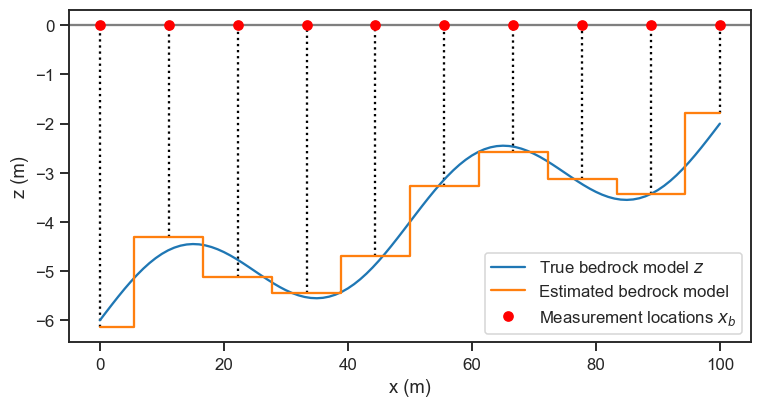

In [4]:
v = 2500
G = np.eye(10) * 2/v
mest = inv(G) @ d

x, z = data.get_true_topography() # Getting true bedrock for plotting purposes

plt.figure(dpi=110, figsize=(8,4))
plt.axhline(0, ls="-", c="k", alpha=0.5)
plt.plot(x, z, label="True bedrock model $z$")
plt.step(x_b, -mest, where="mid", label="Estimated bedrock model")
plt.plot(x_b, np.zeros_like(x_b), "ro", label="Measurement locations $x_b$")
plt.vlines(x_b, -mest, 0, linestyles="dotted")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.legend()

### 2.3) Damping

Now assume an under-determined problem, with only 4 measurements and 10 bedrock segments (i.e., model parameters). Estimate the bedrock depth for the sparse data set using the **damped-least squares solution** (often used for mixed-determined problems). Remember to keep the number of parameters (of the bedrock depth) the same as in 2.2. You can use the code snippet above (task 2.2) and only use a subset of the data (and also just a subset of rows in $\mathbf{G}$):

``` python
x_b_sparse = x_b[::3] # every third measurement location
d_sparse = d[::3] # every third measurement
```

Use damping constraints ($\mathbf{W}_m = I$) to solve the least-squares problem. Vary the regularization parameter between $10^{-10}$ and $1$ and describe the results. Which value would you choose? Plot the final bedrock estimation.

**Solution**:

$$
\mathbf{m}_\mathrm{est} = [\mathbf{G}^T \mathbf{G} + \beta \, \mathbf{I}]^{-1} \, \mathbf{G}^T \mathbf{d}
$$

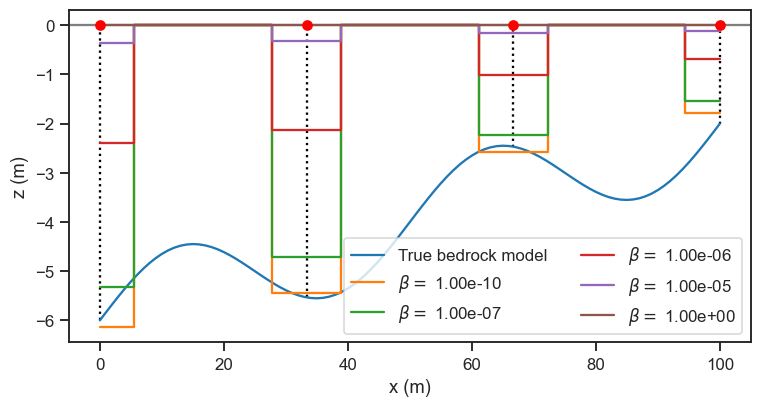

In [5]:
x_b_s = x_b[::3]
d_s = d[::3]
G_s = G[::3]
I = np.eye(G_s.shape[1])

plt.figure(figsize=(8,4), dpi=110)
plt.axhline(0, ls="-", c="k", alpha=0.5)
plt.plot(x, z, label="True bedrock model")

for beta in 1e-10, 1e-7, 1e-6, 1e-5, 1:
    G_g = np.linalg.inv(G_s.T @ G_s + beta * I) @ G_s.T
    m_est_s = G_g @ d_s
    plt.step(x_b, -m_est_s, where="mid", label=r"$\beta =$ %.2e" % beta)

z_b = data.get_true_model() # Getting true, discrete bedrock model for plotting purposes only

plt.plot(x_b_s, np.zeros_like(x_b_s), "ro")
plt.vlines(x_b[::3], z_b[::3], 0, linestyles="dotted")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.legend(ncol=2)

### 2.4) Smoothing

Formulate a smoothing constraints matrix that approximates the first derivative of adjacent model parameters, i.e., that favors a smooth parameter evolution along the x-axis.

Solve the problem using smoothness constraints. Again, vary the regularizuation parameter and select a suitable regularization strength. Plot the result for different smoothing strengths.




**Solution**:

Here, we use the regularized least-squares solution with smoothing.

$$
\mathbf{m}_\mathrm{est} = [\mathbf{G}^T \mathbf{G} + \beta \, \mathbf{W}^T\mathbf{W} ]^{-1} \, \mathbf{G}^T \mathbf{d}
$$

In [6]:
Nm = G_s.shape[-1]
Wm = np.eye(Nm - 1, Nm, k=1) - np.eye(Nm - 1, Nm)
Wm.shape

(9, 10)

In [7]:
Wm

array([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

You can use [plt.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show a matrix. Here, we use the heatmap function in the seaborn package, which offers a bit more functionality. See documentation and examples here: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

Text(0.5, 1.0, 'Smoothing matrix W$_m$')

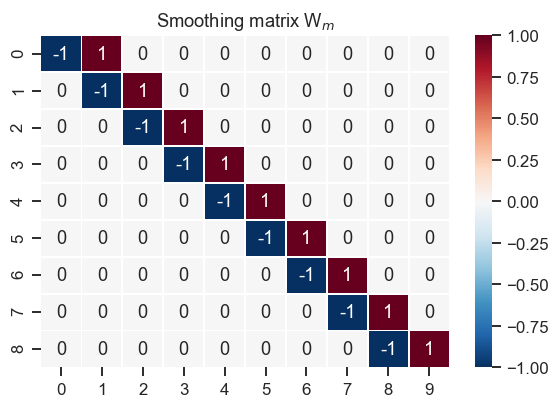

In [8]:
plt.figure(dpi=110)
seaborn.heatmap(Wm, annot=True, cmap="RdBu_r", linewidths=.5)
plt.title("Smoothing matrix W$_m$")

In [9]:
GtG = G_s.T @ G_s

plt.figure(figsize=(9,4), dpi=110)
plt.axhline(0, ls="-", c="k", alpha=0.5)
plt.plot(x, z, label="True bedrock model")

for beta in 1e-10, 5e-6, 1:
    m_smooth = np.linalg.inv(GtG + beta * Wm.T @ Wm) @ G_s.T @ d_s
    plt.step(x_b, -m_smooth, where="mid", label=r"$\beta =$ %.2e" % beta)

plt.plot(x_b_s, np.zeros_like(x_b_s), "ro")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.legend(ncol=2)